# Principal Component Analysis
Principal Component Analysis is a process used to determine the most important factors when it comes to discriminating between the inputs. The greater the number of features, the more complex the problem, and the more data is needed to evaluate the classifier.

One such approach is using Singular Value Decomposition. This sort of technique works for continuous data, rather than categorical data. Because the first dataset is continuous, PCA is performed using SVD.
An orthogonal transformation is performed on the initial dataset using an eigenvalue method to convert potentially correlated feature column data to a new axis using single value decomposition (SVD). Then the resulting rows of the loading vectors are graphed to determine how much the components’ ‘weights’ affect the classification of the original features. These graphs can be used to determine which features contribute the largest amount proportionally to the placement of the data points on the plots.


In [1]:
# import dependencies
import pandas as pd
import numpy as np

In [2]:
# import data
df_norm = pd.read_csv('VSA_new_norm.csv')
df_tot = pd.read_csv('VSA_new_total.csv')

In [3]:
# convert them into numpy arrays
tot_features = df_tot.values
norm_features = df_norm.values

## Singular Value Decomposition
For each dataset, one normalized and one not normalized, I will perform the Sigular Value Decomposition. Singular Value decomposition determines three components that a matrix can be broken into, U, S, and V.

Given a matrix X, Singular Value Decomposition gives the following:

__X = USV'__

The following describes each of the three matrices that are the components of X.

### U - The Scores Matrix
Each row corresponds to an observation. Each column is called a "left singular vector" and forms the orthonormal basis for the variables: ui * uj = 1 when i=j, and 0 otherwise.

### S - The Covariance Matrix
A diagonal matrix which contains the covariances of the columns.

### V' - The Loadings Matrix
Each row is called a "right singular vector" or "Principal Component", and forms an orthanormal basis for the observations.

## Scree Plots
After performing PCA on a set of data, a scree plot shows how much of variance in the data comes from a certain number of Principal Components. The Eigenvalue of a PC is the contribution ratio of that particular PC to the data's variance. A cumulative Scree Plot is good for determining how many features to use. 

Scree Plots for Non-Normalized Features


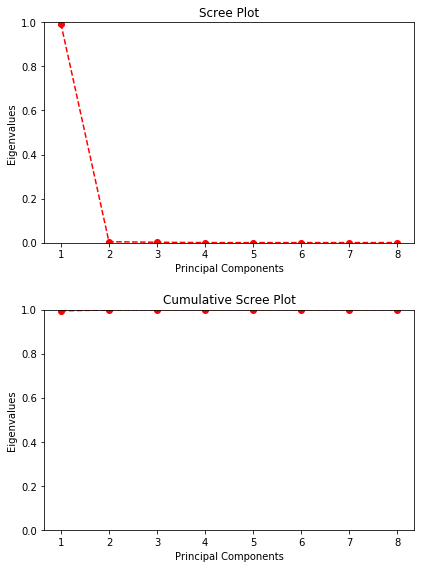

Scree Plots for Normalized Features


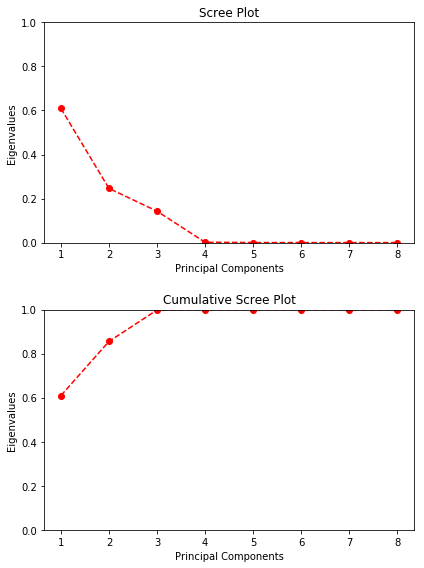

In [4]:
import matplotlib
import matplotlib.pyplot as plt

# Creates both a regular and cumulative scree plot for the input matrix given feature number
def scree_plt(A, num_features):
    U, S, V = np.linalg.svd(A)
    S = np.diag(S)
    weights2 = np.zeros(num_features)
    S2 = S**2
    sumS2 = sum(sum(S2))
    weightsum2 = 0
    weight_c2 = np.zeros(num_features)
    for i in range(num_features):
        weights2[i] = S2[i,i]
        weightsum2 += weights2[i]
        weight_c2[i] = weightsum2
    # plots
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_figheight(8)
    # plot scree plot
    ax1 = plt.subplot(211)
    ax1.set(ylabel='Eigenvalues', xlabel='Principal Components', title='Scree Plot')
    ax1.set_ylim(bottom=0.0, top=1.0)
    ax1.plot(range(1,num_features+1), weights2/sum(weights2), 'r--', \
                range(1,num_features+1), weights2/sum(weights2), 'ro')
    # plot Cumulative Scree Plot
    ax2 = plt.subplot(212)
    ax2.set(ylabel='Eigenvalues', xlabel='Principal Components', title='Cumulative Scree Plot')
    ax2.set_ylim(bottom=0.0, top=1.0)
    ax2.plot(range(1,num_features+1), weight_c2/np.amax(weight_c2), 'r--', \
                      range(1,num_features+1), weight_c2/np.amax(weight_c2), 'ro')
    # make plots taller
    plt.tight_layout(h_pad = 2.0)
    plt.show()
    
# get number of features
num_features = norm_features.shape[1] 

# plot the scree plots for non-normalized features
print("Scree Plots for Non-Normalized Features")
scree_plt(tot_features, num_features)

# plot the scree plots for normalized features
print("Scree Plots for Normalized Features")
scree_plt(norm_features, num_features)

Looking at the graphs above, normalizing the features weights the features more evenly so that one is not disproportionalty represented because it is on a different scale. That is why for the non-normalized features, the first component makes up almost 100% of all variability in the data.

The Scree Plots for the normalized data are much more even. These graphs show that just the first three Principal Components contribute to nearly 100% of the variance. Therefore, when performing any sort of classification, using any more than the first three components will not increase the accuracy of the results.

## Loading Vectors
The Loading Vector plot plots the contribution of each original feature to a particular component. The greater the value of the component corresponding to the loading vector, the greater the importance of that feature in determining the variance in that PC. Each Loading Vector represents a row of V', or the Loadings Matrix, after perfomring SVD.

Seeing that the first three PCs are the most important, I made Loading Vectors for the first three PCs.

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Loading Vectors for First 3 PC for Non-Normalized Features


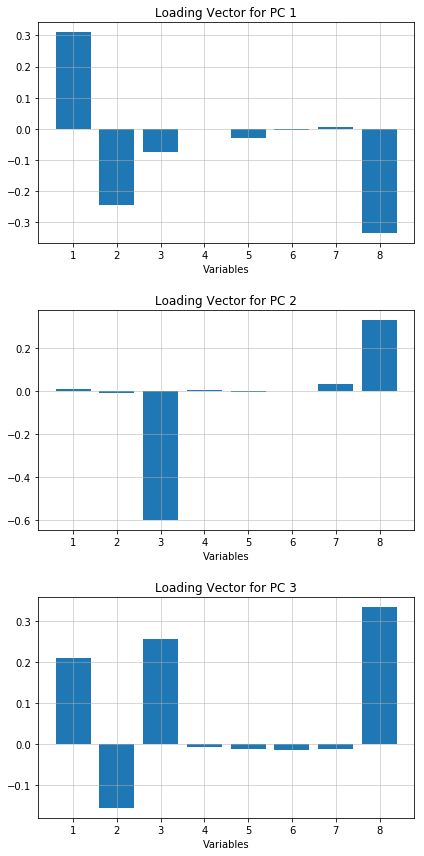

Loading Vectors for First 3 PC for Normalized Features


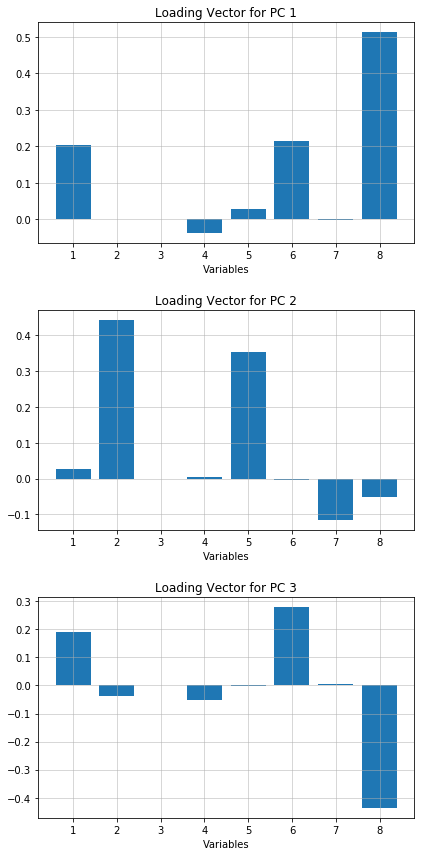

In [6]:
# Creates the specified number of vectors for a given number of features
# for the data in matrix A
def lv_plt(A, num_features, num_vectors):
# plot indices
    U, S, V = np.linalg.svd(A)
    Vsquare = np.zeros((num_features,num_features))
    for i in range(num_features):
        for j in range(num_features):
            Vsquare[i,j] = V[i,j]**2
            if (V[i,j] > 0):
                Vsquare[i,j] *= -1
            else:
                Vsquare[i,j] *= 1

    # making the plots
    fig = plt.figure()
    fig.set_figheight(4 * num_vectors)
    subpl = 1
    # Loading Vectors
    for i in range(num_vectors):
        ax = fig.add_subplot(num_vectors,1,subpl)
        x = np.arange(1,Vsquare.shape[0]+1)
        ax.grid(linestyle='-', linewidth=0.5)
        ax.bar(x,Vsquare[:,i])
        lvtitle = "Loading Vector for PC " + str(i + 1)
        ax.set(xlabel="Variables", title=lvtitle)
        subpl+=1
    plt.tight_layout(h_pad = 2.0)
    plt.show()
    
# get number of features
num_features = norm_features.shape[1] 

# plot 3 loading vectors for the non-normalized features
print("Loading Vectors for First 3 PC for Non-Normalized Features")
lv_plt(tot_features, num_features, 3)

# plot 3 loading vectors for the normalized features
print("Loading Vectors for First 3 PC for Normalized Features")
lv_plt(norm_features, num_features, 3)

Observing the graph above shows that feature 8, gap delta, is the most important feature for Principal Component 1.

Loading Vector 2 shows that feature 2, number of quarters without courses, is the most important for PC 2.

PC3's loading vector shows that again, gap delta is most important.

In [7]:
# create a dataset only containing 
df_norm_reduced = df_norm[['NumberOfQtrWithoutCourses', 'GapDelta']]
df_norm_reduced.to_csv('VSA_norm_reduced.csv')